In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import nltk
import spacy
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# How can character archetypes drive a movie’s success over the years ?

## 1. What are the different character tropes ?
(Laeti, Nhat)
### 1.1 Analyse the character type based on the gender

In this first section, we analyse how the character types differ depending on the genre of the actor. We analyse how many word are used to describe them, and what type of lexical field is used.


### Character description based on adjectives and verbs

In [3]:
dataPath = './data/clean/'
#Load the data
female_characters = pd.read_csv(dataPath + 'female_character_description.txt', sep=',')
male_characters = pd.read_csv(dataPath + 'male_character_description.txt', sep=',')

In [4]:
male_characters["word_count"].describe()

count    5534.000000
mean        2.344416
std         0.935044
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: word_count, dtype: float64

In [5]:
female_characters["word_count"].describe()

count    487.000000
mean       1.714579
std        0.474291
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: word_count, dtype: float64

#### Analysis

We can see that they are 11 more men characters than female characters, showing that they are over represented in the film industry. Fewer word are used to describe women then men.

In [7]:
# Load the pre-trained spaCy model
nlp = spacy.load('en_core_web_sm')

# Sample DataFrame
data_female = female_characters['Character Type']
data_male = male_characters['Character Type']


data_female = pd.DataFrame(data_female)
data_male = pd.DataFrame(data_male)

# Function to extract adjectives from a description
def extract_words(text, pos_type):
    doc = nlp(text)
    # Extract tokens that match the desired part of speech
    pos_tokens = [token.text.lower() for token in doc if token.pos_ == pos_type]
    return pos_tokens

# Apply the function to the 'Character Type' column for both adjectives and verbs
data_female['adjectives'] = data_female['Character Type'].apply(lambda x: extract_words(x, 'ADJ'))
data_female['verbs'] = data_female['Character Type'].apply(lambda x: extract_words(x, 'VERB'))

data_male['adjectives'] = data_male['Character Type'].apply(lambda x: extract_words(x, 'ADJ'))
data_male['verbs'] = data_male['Character Type'].apply(lambda x: extract_words(x, 'VERB'))

In [8]:
data_female['adjectives'].value_counts()

adjectives
[]                366
[dumb, blonde]     62
[final]            51
[arrogant]          5
[eccentric]         3
Name: count, dtype: int64

In [9]:
data_female['verbs'].value_counts()

verbs
[]          434
[broken]     44
[klutz]       9
Name: count, dtype: int64

In [10]:
data_male['adjectives'].value_counts()

adjectives
[]                      3189
[crazy, jealous]         398
[byronic]                290
[corrupt, corporate]     247
[dirty]                  144
[cultured]               104
[fastest]                101
[loveable]                96
[sargeant]                93
[egomaniac]               91
[romantic]                72
[professional]            66
[young]                   62
[arrogant]                58
[absent, minded]          56
[playful]                 56
[evil]                    53
[crazy]                   51
[soft]                    46
[eccentric]               46
[grumpy, old]             45
[stupid]                  43
[big]                     36
[dumb]                    34
[bromantic]               29
[bankrupt]                27
[dumb, blonde]             1
Name: count, dtype: int64

In [11]:
data_male['verbs'].value_counts()

verbs
[]              4967
[drill]           93
[hardboiled]      87
[retired]         81
[casanova]        69
[consummate]      66
[henpecked]       64
[turned]          53
[broken]          22
[made]            22
[klutz]           10
Name: count, dtype: int64

In [12]:
# Flatten the lists and combine all words into a single string
all_adjectives_female = ' '.join([word for sublist in data_female['adjectives'] for word in sublist])
all_verbs_female = ' '.join([word for sublist in data_female['verbs'] for word in sublist])

#because not many words are used, merge the adjectives and verbs
all_words_female = all_adjectives_female + all_verbs_female

all_adjectives_male = ' '.join([word for sublist in data_male['adjectives'] for word in sublist])
all_verbs_male = ' '.join([word for sublist in data_male['verbs'] for word in sublist])

#merge the adjectives and verbs
all_words_male = all_adjectives_male + all_verbs_male

In [14]:
#generate wordcloud
face_men = np.array(Image.open("./data/image/face_men.png"))
face_women = np.array(Image.open("./data/image/face_women.png"))
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

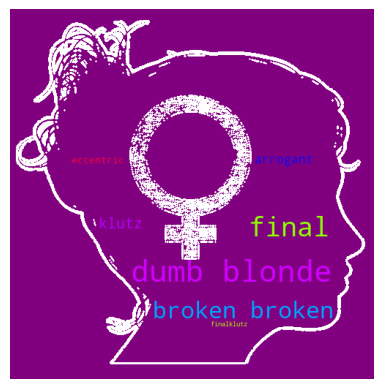

In [28]:
wc_female = WordCloud(background_color = 'purple', mask = face_women, contour_width = 2,
     contour_color = 'white', colormap = 'hsv', width = 800, height = 500).generate(all_words_female)
plt.axis("off")
plt.imshow(wc_female)

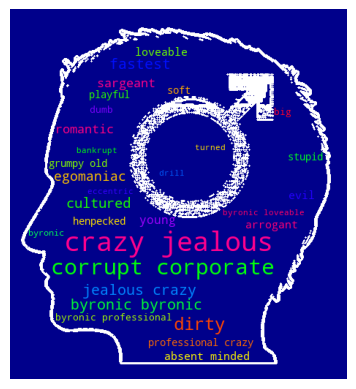

In [27]:
wc_male = WordCloud(background_color = 'darkblue', mask = face_men, contour_width = 2,
     contour_color = 'white', colormap = 'hsv', width = 800, height = 500, max_words=30).generate(all_words_male)
plt.axis("off")
plt.imshow(wc_male)

### Analysis

After observing that fewer words are used to describe female characters, the visualization reveals that predominantly negative words are used. The most common description for female characters is "dumb blond," which is quite reductive. The only two verbs used to describe them are "klutz" and "broke."

In contrast, men are described in more complex terms, reflecting more nuanced characters. Their descriptions encompass a wider range of lexical fields than those for women, ranging from romantic to egomaniacal to cultured. The concept of romance is also explored through the use of the adjective "bromantic."

Even uncommon words are used, such as "Byronic." A Byronic hero is a fictional character who is a moody rebel, often haunted by a dark secret from his past. This demonstrates that even a single word can reveal a great deal about a character.

##  What has been the evolution of character tropes over the years ?
(Laeti, Nhat)

## What is considered a “hero” profile and a “villain” profile ?
(?)

## What is considered a “successful” movie ?
(Arun)

## Does the character’s actor affect a movie’s success ?
(Arian)

## What character archetypes make a movie successful ?
(Arun, Arian)(P3)

## Do character archetypes affect a movie’s success depending on the film genre ?
(Arun, Arian)